Get player data

In [2]:
from nba_api.stats.endpoints import PlayerDashPtShots
import pandas as pd

# Example: Stephen Curry (Player ID: 201939, Team ID: 1610612744 for Warriors)
player_id = 201939
team_id = 1610612744  # Replace with player's team ID

# Fetch shooting data
shot_data = PlayerDashPtShots(player_id=player_id, team_id=team_id).get_data_frames()[0]

# Display first few rows
print(shot_data.head())


   PLAYER_ID PLAYER_NAME_LAST_FIRST  SORT_ORDER  GP   G SHOT_TYPE  \
0     201939         Curry, Stephen           1  54  54   Overall   

   FGA_FREQUENCY  FGM  FGA  FG_PCT  EFG_PCT  FG2A_FREQUENCY  FG2M  FG2A  \
0            1.0  438  974    0.45    0.576           0.374   192   364   

   FG2_PCT  FG3A_FREQUENCY  FG3M  FG3A  FG3_PCT  
0    0.527           0.626   246   610    0.403  


Get every player on the warriors

In [5]:
from nba_api.stats.endpoints import CommonTeamRoster
import pandas as pd

# Warriors team ID
team_id = 1610612744  # Golden State Warriors

# Fetch roster data
roster = CommonTeamRoster(team_id=team_id).get_data_frames()[0]

# Select only Player ID and Name
df_warriors = roster[['PLAYER_ID', 'PLAYER']]

# Show results
print(df_warriors)


    PLAYER_ID                PLAYER
0     1642379       Taran Armstrong
1     1627780        Gary Payton II
2     1630228      Jonathan Kuminga
3     1641764    Brandin Podziemski
4     1630541           Moses Moody
5     1626172          Kevon Looney
6     1627741           Buddy Hield
7      202710      Jimmy Butler III
8     1630296           Braxton Key
9     1630611            Gui Santos
10    1642366          Quinten Post
11     203110        Draymond Green
12     201939         Stephen Curry
13    1631218  Trayce Jackson-Davis
14    1642050          Jackson Rowe
15    1630311           Pat Spencer


Rank the players by three point shooting percentage

In [ ]:
from nba_api.stats.endpoints import CommonTeamRoster, PlayerCareerStats
import pandas as pd

# Warriors team ID
team_id = 1610612744  # Golden State Warriors

# Step 1: Fetch the Warriors roster
roster = CommonTeamRoster(team_id=team_id).get_data_frames()[0]
players = roster[['PLAYER_ID', 'PLAYER']]

# Step 2: Fetch each player's career 3PT%
three_pt_data = []
for _, row in players.iterrows():
    player_id = row['PLAYER_ID']
    player_name = row['PLAYER']
    
    # Get career stats
    career_stats = PlayerCareerStats(player_id=player_id).get_data_frames()[0]
    
    # Check if stats exist
    if not career_stats.empty and 'FG3_PCT' in career_stats.columns:
        three_pt_pct = career_stats.iloc[-1]['FG3_PCT']  # Latest season
    else:
        three_pt_pct = None  # Handle players with no data
    
    # Store data
    three_pt_data.append({'Player': player_name, '3PT%': three_pt_pct})







ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

Rank

In [ ]:
# Step 3: Convert to DataFrame and Rank
df_3pt = pd.DataFrame(three_pt_data)
df_3pt = df_3pt.dropna().sort_values(by="3PT%", ascending=False).reset_index(drop=True)

print(df_3pt)

Display results

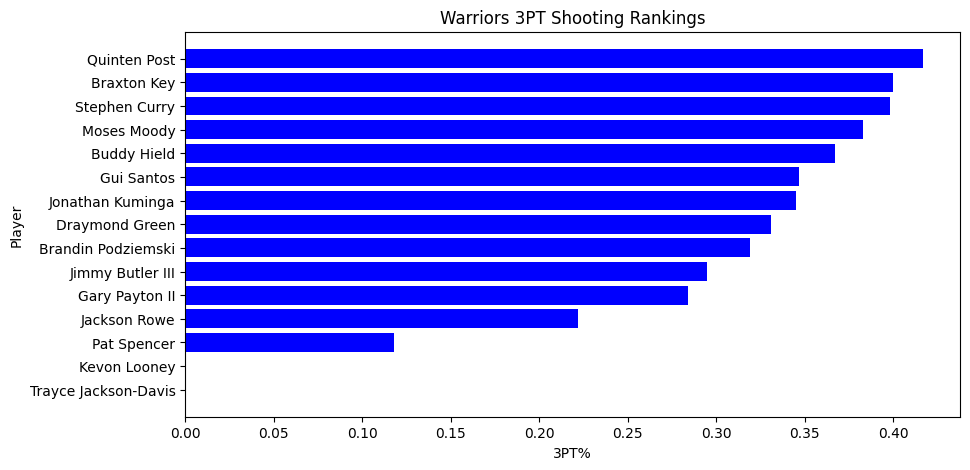

In [9]:
# Display ranked players
import matplotlib.pyplot as plt

# Plot bar chart for 3PT rankings
plt.figure(figsize=(10, 5))
plt.barh(df_3pt['Player'], df_3pt['3PT%'], color='blue')
plt.xlabel("3PT%")
plt.ylabel("Player")
plt.title("Warriors 3PT Shooting Rankings")
plt.gca().invert_yaxis()  # Highest % at the top
plt.show()